### Trying to practice some data science skills on regression data
#### By Gregory Glickert

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_predict

### Let's start by reading in the data and doing a basic clean up

In [2]:
training_data = pd.read_csv("train.csv")

y = training_data['SalePrice'] 
X = training_data.drop('SalePrice', axis=1) # features df
X.dropna(axis=1, inplace=True) # drops columns with NaN

### Now lets take a look at the data

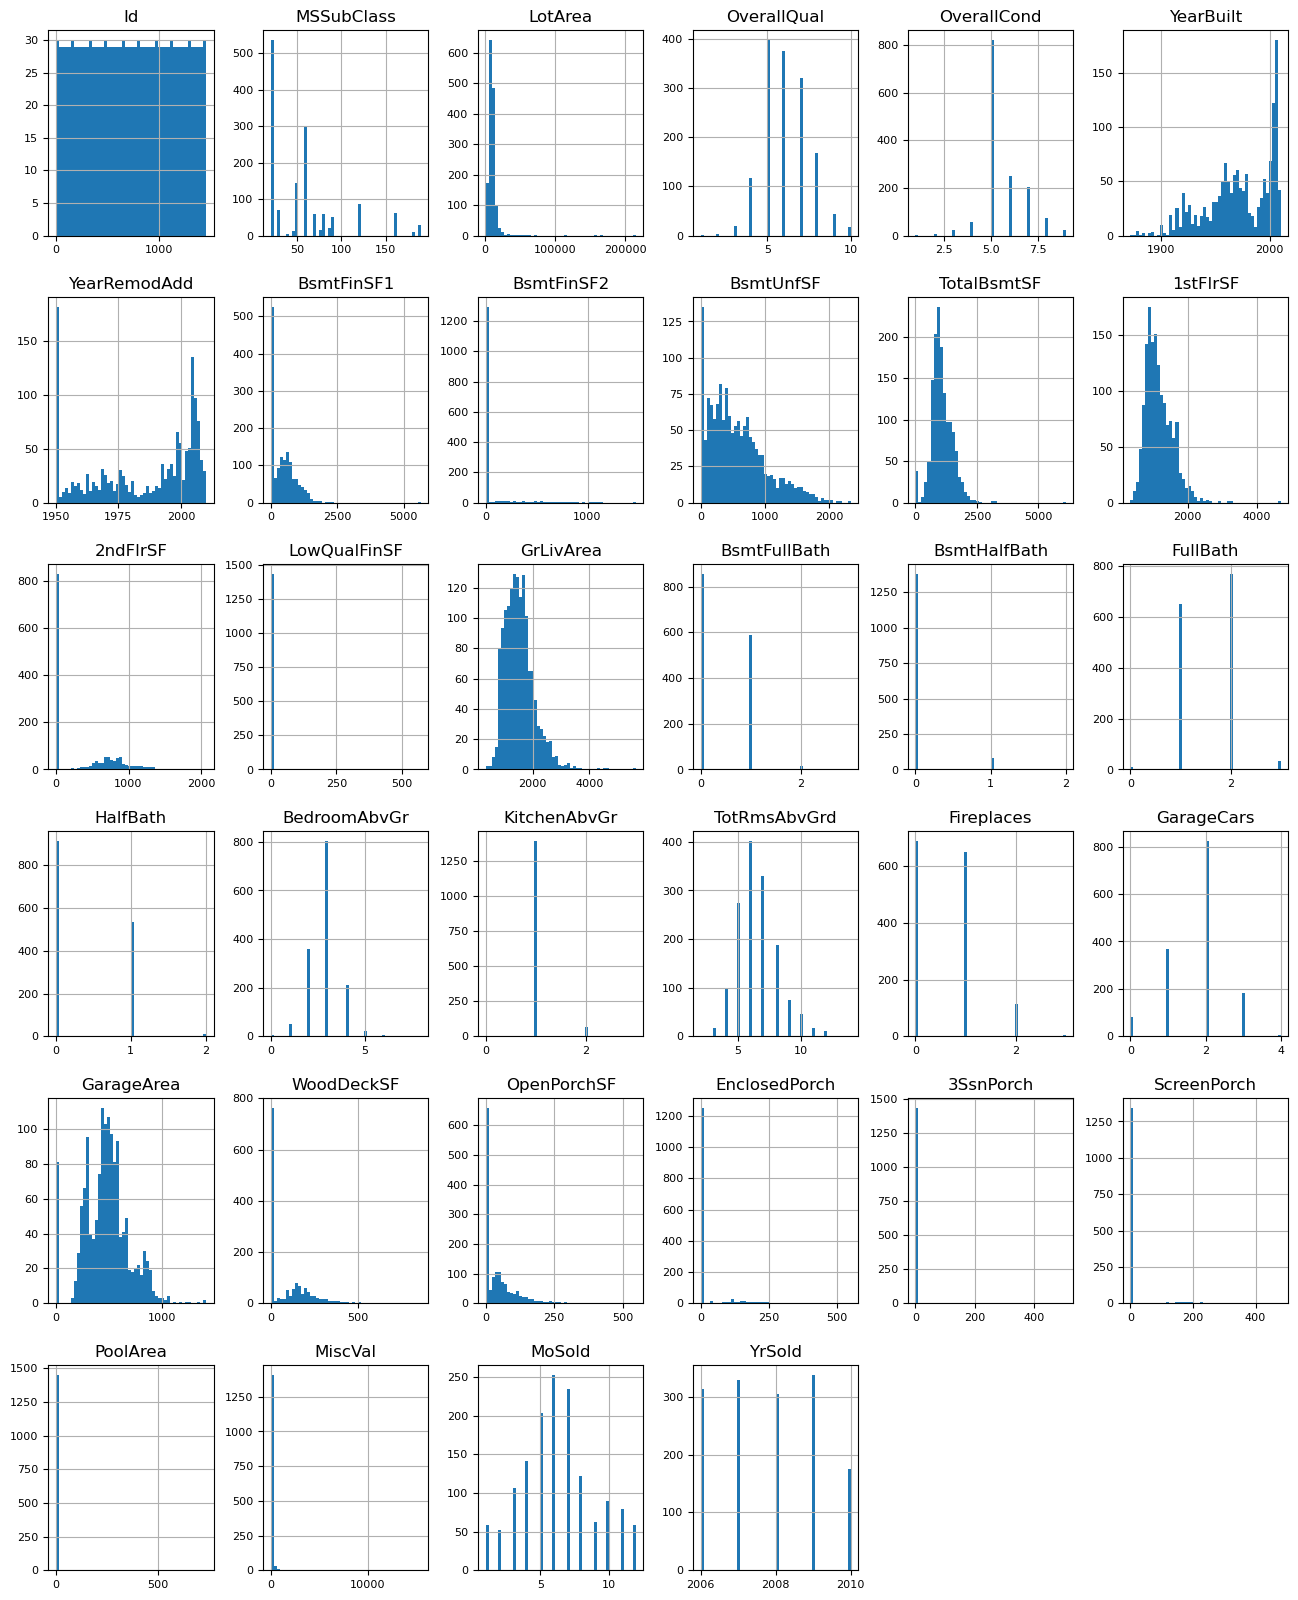

In [3]:
X_num = X.select_dtypes(include = ['float64', 'int64'])

X_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

### We can also visualize the cat data 

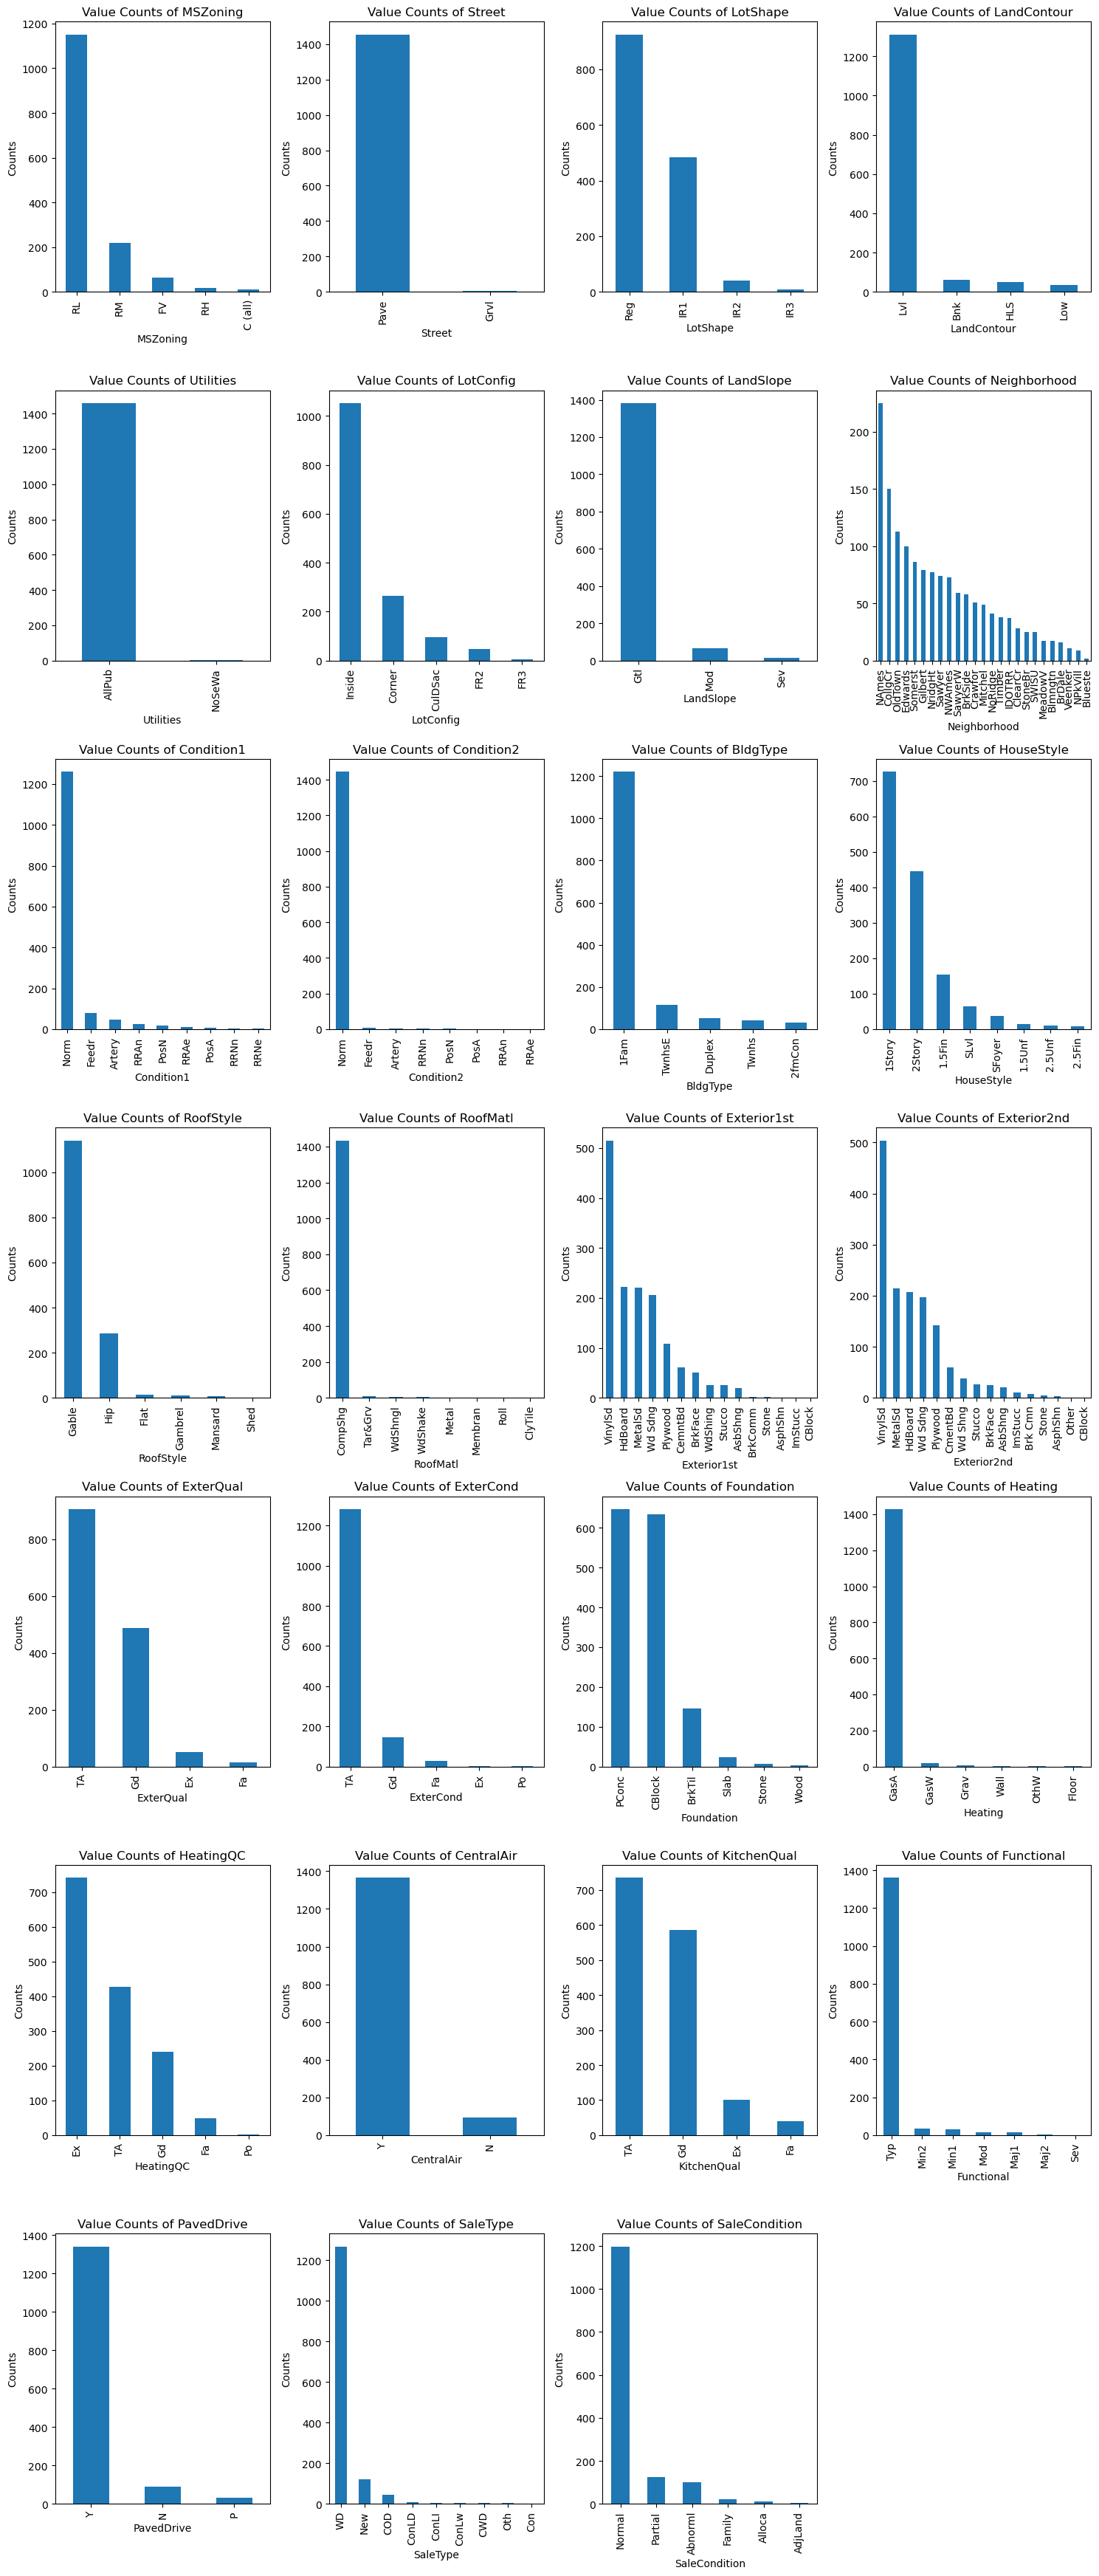

In [4]:
X_cat = X.select_dtypes(include=['object']) # object is all things cat type

# Set up the number of rows and columns for subplots
n_cols = 4  # You can change this based on the number of columns you want per row
n_rows = (len(X_cat.columns) // n_cols) + (len(X_cat.columns) % n_cols > 0)

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Iterate over categorical columns and axes
for i, col in enumerate(X_cat.columns):
    X_cat[col].value_counts().plot(kind='bar', ax=axes[i], title=f'Value Counts of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

# Remove unused subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### If we want to use our cat features then we have to encode them. I will use one hot encoding or label encoding 

In [5]:
# one hot
#X = pd.get_dummies(X)

In [6]:
# We could also label encode them 
cols = X.columns
num_cols = X._get_numeric_data().columns  # Numeric columns
cat_cols = list(set(cols) - set(num_cols))  # Categorical columns

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,7917,1,3,3,0,4,0,...,40,0,0,0,0,0,8,2007,8,4
1456,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,0,2,2010,8,4
1457,1458,70,3,9042,1,3,3,0,4,0,...,60,0,0,0,0,2500,5,2010,8,4
1458,1459,20,3,9717,1,3,3,0,4,0,...,0,112,0,0,0,0,4,2010,8,4


In [7]:
model = linear_model.LinearRegression()

scores = cross_val_score(model, X, y, cv=5)

print(f"score of the model is {scores.mean()}")

score of the model is 0.8058760165008898


### Now we if we try a different model type?

In [8]:
model = linear_model.Lasso(alpha=1,max_iter=5000)
scores = cross_val_score(model, X, y, cv=5)

print(f"score of the model is {scores.mean()}")

score of the model is 0.8058882831274266


/home/gjgpb9/miniconda3/envs/NME/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.960e+10, tolerance: 7.706e+08
  model = cd_fast.enet_coordinate_descent(


### Lasso and linear regression before similar you can also get importance out of lasso

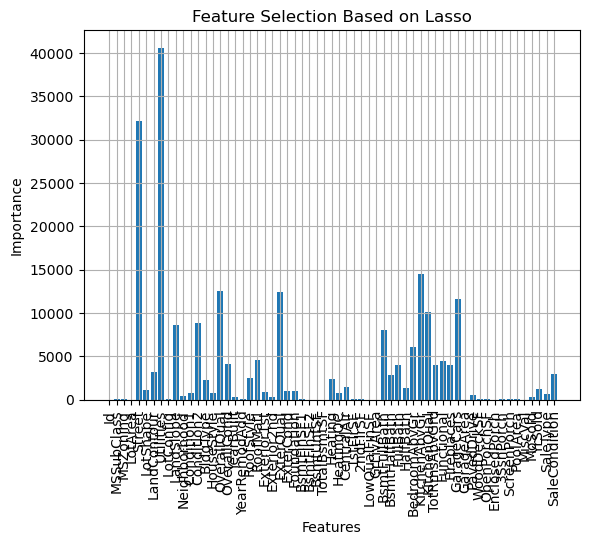

In [9]:
lasso1 = linear_model.Lasso()
lasso1.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(X.columns, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### We can also use other model types with the cross val score

In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print(f"score of the model is {scores.mean()}")

score of the model is 0.858449654719513


### Let's also try a fancy XGBOOST regression 

In [11]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,   # Number of trees in the ensemble
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,        # Maximum depth of a tree   
)

scores = cross_val_score(model, X, y, cv=5)

print(f"score of the model is {scores.mean()}")


score of the model is 0.8775139093399048


### THe XGBOOST regression did the best!

### I wanted to explore the most important features in the lasso regression and compare that to the most important in XGBOOST

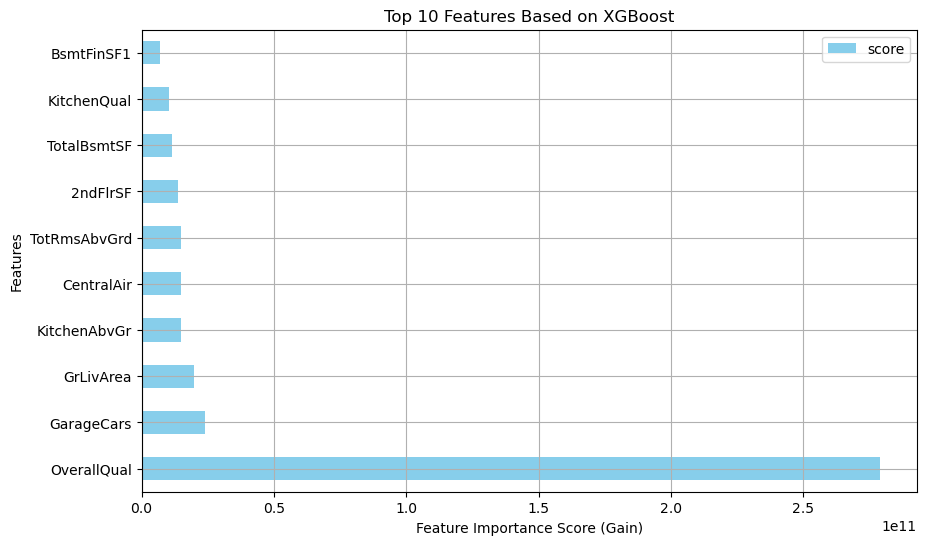

In [12]:
# refit model to be able to access everything easy
model.fit(X,y)

feature_important = model.get_booster().get_score(importance_type='gain')  # Use 'gain' instead of 'weight'
keys = list(feature_important.keys())
values = list(feature_important.values())

# Step 3: Create a DataFrame for sorting
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)

# Step 4: Select and plot the top 10 features
top_10_features = data.nlargest(10, columns="score")
top_10_features.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Features Based on XGBoost")
plt.xlabel("Feature Importance Score (Gain)")
plt.ylabel("Features")
plt.grid()
plt.show()

top_10_features_xg = top_10_features

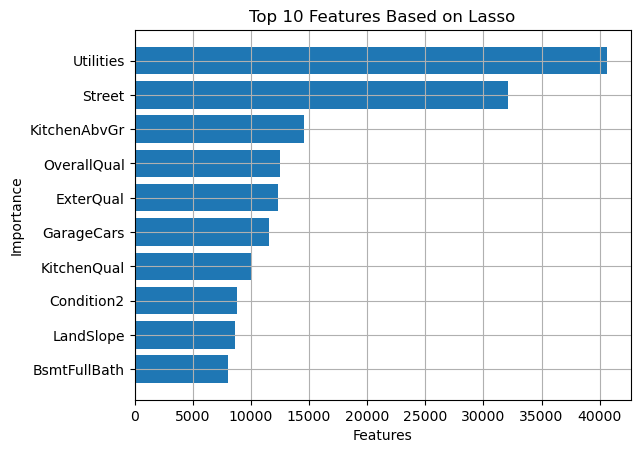

In [13]:
lasso1_coef = np.abs(lasso1.coef_)

# Get the indices of the top 10 features
top_10_indices = np.argsort(lasso1_coef)[-10:]  # Sort and take the last 10 (largest)

# Get the top 10 feature names and their coefficients
top_10_features = X.columns[top_10_indices]
top_10_importances = lasso1_coef[top_10_indices]
top_10_features_lasso = top_10_features

# Plot the top 10 features
plt.barh(top_10_features, top_10_importances)
plt.grid()
plt.title("Top 10 Features Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [14]:
top_10_features_xg.index

Index(['OverallQual', 'GarageCars', 'GrLivArea', 'KitchenAbvGr', 'CentralAir',
       'TotRmsAbvGrd', '2ndFlrSF', 'TotalBsmtSF', 'KitchenQual', 'BsmtFinSF1'],
      dtype='object')

In [15]:
top_10_features_lasso

Index(['BsmtFullBath', 'LandSlope', 'Condition2', 'KitchenQual', 'GarageCars',
       'ExterQual', 'OverallQual', 'KitchenAbvGr', 'Street', 'Utilities'],
      dtype='object')

In [16]:
overlaping_features = top_10_features_lasso.symmetric_difference(top_10_features_xg.index)
overlaping_features

Index(['2ndFlrSF', 'BsmtFinSF1', 'BsmtFullBath', 'CentralAir', 'Condition2',
       'ExterQual', 'GrLivArea', 'LandSlope', 'Street', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'Utilities'],
      dtype='object')

### It appears that lasso and xg boost got similar results for finding the most important features

### Now let's build a model using on these features and see how it compared to the full list

In [17]:
top_features = X[overlaping_features]
top_features

,2ndFlrSF,BsmtFinSF1,BsmtFullBath,CentralAir,Condition2,ExterQual,GrLivArea,LandSlope,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities
0,854,706,1,1,2,2,1710,0,1,8,856,0
1,0,978,0,1,2,3,1262,0,1,6,1262,0
2,866,486,1,1,2,2,1786,0,1,6,920,0
3,756,216,1,1,2,3,1717,0,1,7,756,0
4,1053,655,1,1,2,2,2198,0,1,9,1145,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,694,0,0,1,2,3,1647,0,1,7,953,0
1456,0,790,1,1,2,3,2073,0,1,7,1542,0
1457,1152,275,0,1,2,0,2340,0,1,9,1152,0
1458,0,49,1,1,2,3,1078,0,1,5,1078,0


In [18]:
scores = cross_val_score(model, top_features, y, cv=5)

print(f"score of the XG Boost model is {scores.mean()}")

model = linear_model.Lasso(alpha=1,max_iter=10000)
scores = cross_val_score(model, top_features, y, cv=5)

print(f"score of the Lasso model is {scores.mean()}")

score of the XG Boost model is 0.7881484985351562
score of the Lasso model is 0.703615211644174


### While our lasso model performs slightly worse we will use it for the rest of the analysis cause it is simple and quick to run.

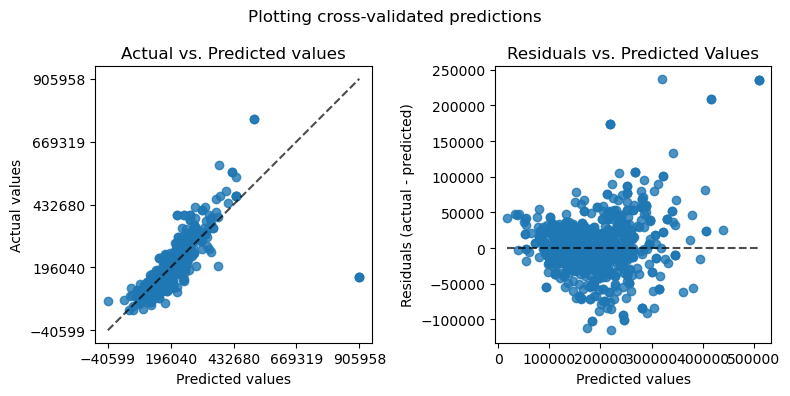

In [19]:
y_pred = cross_val_predict(model, top_features, y, cv=5)

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    ax=axs[0]
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    ax=axs[1],
    
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()


## We can see how our model did, and it appears that the residuals look ok with them fairly normal. We do have some big misses but that will happen!